In [ ]:
pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 5.3 MB/s eta 0:00:00


In [ ]:
pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=ecc45a51e008385d94e9e5edfb13f59519cd42c37d3640b24959ca8dde00b951
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


#Bibliotecas

In [ ]:
import requests
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from unidecode import unidecode
import unicodedata
import wikipedia
wikipedia.set_lang("pt")

#Stopwords
Abaixo, de forma geral, é interessante retirar o que em NLP(Natural Language Processing, ou Processamento de Linguagem Natural) é chamado comumente de “Stopword”. Stopwords são palavras muito comuns em um idioma que geralmente não carregam muito significado por si só.

-Artigos(o, a, um, uma)

-Preposições (de, para, com)

-Pronomes(eu, tu, ele)


são alguns exemplos de Stopwords. Como a matriz dos dados é tal que tem como colunas e linhas documentos e termos e como nesse estudo estamos interessados na quantidade de vezes que certo termo aparece em um dado documento, esta base de dados ficaria poluída se esse tipo de palavra fosse levado em consideração.


In [ ]:
nltk.download('stopwords')
stopwords_pt = stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Assuntos

Como desejamos um modelo que distinga bem as palavras dependendo do contexto, é interessante que os assuntos abordados nos documentos tenham uma variedade razoável para que a nossa DTM (Document Term Matrix ou Matriz de Documentos por Termos) esteja populada com palavras variadas contidas em documentos de diferentes assuntos. Para isso, foi feita uma seleção de algumas áreas que pareciam ser interessantes para que tal objetivo fosse atingido.


In [ ]:
assuntos = [
    "Álgebra linear",
    "Análise de dados",
    "Matemática",
    "Geometria",
    "Cálculo",
    "Probabilidade",
    "Estatística",
    "Geografia",
    "Biologia",
    "Ecologia",
    "Evolução",
    "Natureza",
    "História",
    "Física",
    "Química",
    "Astronomia",
    "Matemática aplicada",
    "Ciência da computação",
    "Engenharia",
    "Literatura",
    "Sociologia",
    "Plantas",
    "Poesia",
    "Filosofia",
    "Brasil",
    "Portugal",
    "Animais",
    "Floresta",
    "Alan Turing",
    "Taxonomia",
    "Zoologia",
    "Micologia",
    "Egito",
    "Brasil",
    "Portugal",
    "Roma",
    "Sistema Solar",
    "Platão",
    "Sócrates",
    "Hardy",
    "Ramanujan",
    "China",
    "Mamíferos",
    "Psicologia",
    "Antropologia",
    "Cinema",
    "Redes sociais",
    "Provérbio",
    "Surf",
    "Skate",
    "Música",
    "Futebol",
    "Basquete",
    "Peixe",
    "Buda",
    "Animal de estimação",
    "Dinossauro",
    "Sentimento",
    "Pintura",
    "Grécia",
    "Pokemon",
    "Pikachu",
    "Roedor",
    "Bicicleta",
    "Ensino",
    "Professor"
]

#Pré-Processamento

Como já mencionado antes, gostaríamos de retirar a acentuação, pontuação, algarismos e stopwords de nossos documentos para termos dados mais “limpos” e nessa etapa eh isso que estaremos fazendo.



In [ ]:


def preprocessar(texto):
    # Normaliza acentos
    texto = unicodedata.normalize('NFD', texto).encode('ascii', 'ignore').decode('utf-8')

    # Remove pontuação e números
    texto = re.sub(r'[^a-zA-Z\s]', '', texto)
    texto = re.sub(r'\d+', '', texto)

    # Minúsculas e tokenização
    palavras = texto.lower().split()

    # Remove stopwords e palavras curtas
    palavras_filtradas = [p for p in palavras if p not in stopwords_pt and len(p) > 2]

    return ' '.join(palavras_filtradas)

#DataSet

Um dos maiores acervos de documentos variados que está disponível na internet e que possuem certa acessibilidade são os documentos da wikipedia que estão disponíveis no site de mesmo nome. Eles estão organizados por língua e assunto e foram de grande ajuda na construção do modelo. O código abaixo acessa a página da wikibooks para extrair estes textos.


In [ ]:
def extrair_documentos_com_preprocessamento(assuntos):
    documentos = {}
    for assunto in assuntos:
        try:
            conteudo = wikipedia.page(assunto).content
            texto_limpo = preprocessar(conteudo)
            documentos[assunto] = texto_limpo
        except Exception as e:
            print(f"Erro ao extrair '{assunto}':", e)
    return documentos

#DTM
Nesta etapa, estamos criando uma matriz documento-termo, que possui documentos como linhas, palavras como colunas e seu conteúdo é a ocorrência de uma certa palavra em um certo documento. Assim, possuímos em mãos as palavras que mais ocorrem em certo tipo de documento, o que já começa a nos dar uma ideia do contexto em que ela é utilizada.


In [ ]:
documentos = extrair_documentos_com_preprocessamento(assuntos)#Extraindo os documentos pela api da wikipedia dos assuntos desejados

vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(documentos.values())#Utilizando o CountVectorizer para a criacao da matriz

df_dtm = pd.DataFrame(dtm.toarray(), index=documentos.keys(), columns=vectorizer.get_feature_names_out())#Transformando a matriz em um dataframe para futura utilizacao

/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Erro ao extrair 'Hardy': "Hardy" may refer to: 
Godfrey Harold Hardy
Jeff Hardy
Matt Hardy
Hardy (Arkansas)
Hardy (Iowa)
Hardy (Nebraska)
2866 Hardy
The Hardy Boyz


#Quantas componentes devemos usar?


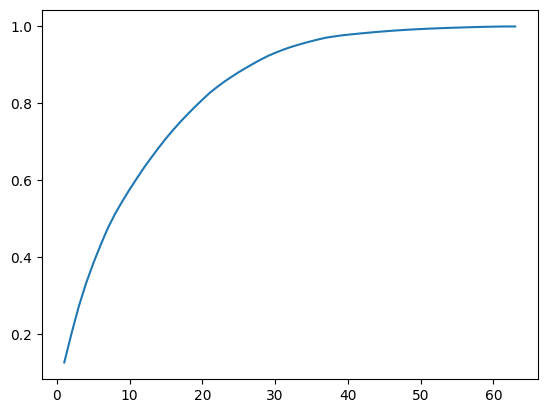

In [ ]:
pca = PCA().fit(dtm.toarray())
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum())

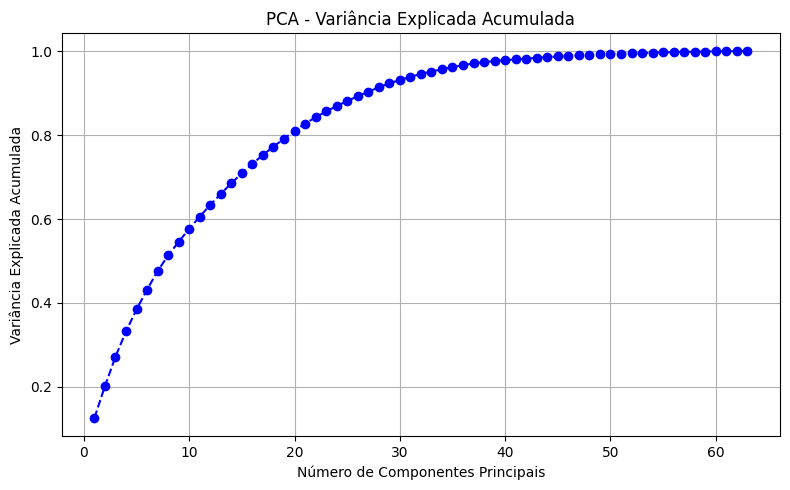

In [ ]:
# Aplica PCA nos dados vetorizados (já transformados com CountVectorizer ou TfidfVectorizer)
pca = PCA().fit(dtm.toarray())

# Plot da variância explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_.cumsum(),
    marker='o', linestyle='--', color='b'
)
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('PCA - Variância Explicada Acumulada')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def mostrar_top_palavras(componente, n=10):
    print(f"\nTop {n} palavras no componente {componente}:")
    top = componentes.loc[f"PC{componente}"].sort_values(ascending=False).head(n)
    print(top)

#visualizar as top 10 palavras nos 3 primeiros componentes
for i in range(1, 4):
    mostrar_top_palavras(i)


Top 10 palavras no componente 1:


NameError: name 'componentes' is not defined

In [ ]:
tdm = df_dtm.T #transponto para que as palavras sejam linhas



scaler = StandardScaler()
term_doc_scaled = scaler.fit_transform(tdm)

pca = PCA(n_components=35)
pca_result = pca.fit_transform(term_doc_scaled)

colunas_pca = [f"PC{i+1}" for i in range(35)]
pca_words = pd.DataFrame(pca_result, index=tdm.index, columns=colunas_pca)

In [ ]:
def palavras_mais_parecidas(vetor_palavra, matriz_palavras, top_n=5):
    sims = cosine_similarity([vetor_palavra], matriz_palavras)[0]
    indices = np.argsort(sims)[::-1][1:top_n+1]
    return [(matriz_palavras.index[i], sims[i]) for i in indices]

In [ ]:
num_palavras = df_dtm.shape[1]
print(f"Número de palavras no modelo: {num_palavras}")

Número de palavras no modelo: 28671


#Similaridade

In [19]:
palavras_mais_parecidas(pca_words.loc["gato"], pca_words, top_n=10)

[('proverbios', np.float64(0.9603433333885678)),
 ('proverbio', np.float64(0.9596970702949512)),
 ('sineta', np.float64(0.9582211330315399)),
 ('levantouse', np.float64(0.956199879790434)),
 ('pendurar', np.float64(0.956199879790434)),
 ('proverbial', np.float64(0.956199879790434)),
 ('sentenca', np.float64(0.9521447998483864)),
 ('ditos', np.float64(0.9518551725057703)),
 ('pescoco', np.float64(0.9504594057009935)),
 ('curta', np.float64(0.9482154955378601))]